# Домашнее задание 1
Задание 1. Скачайте CSV-файл с открытым исходным кодом набора данных (вы можете выбрать любой), загрузите его с помощью Pandas, изучите его, при необходимости выполните предварительную обработку, а затем примените готовую классификацию KNN

# Информация о данных:
Gender: Gender of the passengers (Female, Male)

Customer Type: The customer type (Loyal customer, disloyal customer)

Age: The actual age of the passengers

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Flight distance: The flight distance of this journey

Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Ease of Online booking: Satisfaction level of online booking

Gate location: Satisfaction level of Gate location

Food and drink: Satisfaction level of Food and drink

Online boarding: Satisfaction level of online boarding

Seat comfort: Satisfaction level of Seat comfort

Inflight entertainment: Satisfaction level of inflight entertainment

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: Satisfaction level of baggage handling

Check-in service: Satisfaction level of Check-in service

Inflight service: Satisfaction level of inflight service

Cleanliness: Satisfaction level of Cleanliness

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
df=pd.read_csv('train.csv')
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [9]:
df1 = df[['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'satisfaction']]
df
df1.head()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,13,460,25,18.0,neutral or dissatisfied
1,25,235,1,6.0,neutral or dissatisfied
2,26,1142,0,0.0,satisfied
3,25,562,11,9.0,neutral or dissatisfied
4,61,214,0,0.0,satisfied


In [10]:
df1.loc[:, 'sum of delay in Minutes'] = df1['Departure Delay in Minutes'] + df1['Arrival Delay in Minutes']
df1.head()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_32\2250503780.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.loc[:, 'sum of delay in Minutes'] = df1['Departure Delay in Minutes'] + df1['Arrival Delay in Minutes']


,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,sum of delay in Minutes
0,13,460,25,18.0,neutral or dissatisfied,43.0
1,25,235,1,6.0,neutral or dissatisfied,7.0
2,26,1142,0,0.0,satisfied,0.0
3,25,562,11,9.0,neutral or dissatisfied,20.0
4,61,214,0,0.0,satisfied,0.0


In [11]:
df1['satisfaction'] = df1['satisfaction'].map({
    'satisfied': 1,
    'neutral or dissatisfied': 0
})
df1.head()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_32\2863715041.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['satisfaction'] = df1['satisfaction'].map({


,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,sum of delay in Minutes
0,13,460,25,18.0,0,43.0
1,25,235,1,6.0,0,7.0
2,26,1142,0,0.0,1,0.0
3,25,562,11,9.0,0,20.0
4,61,214,0,0.0,1,0.0


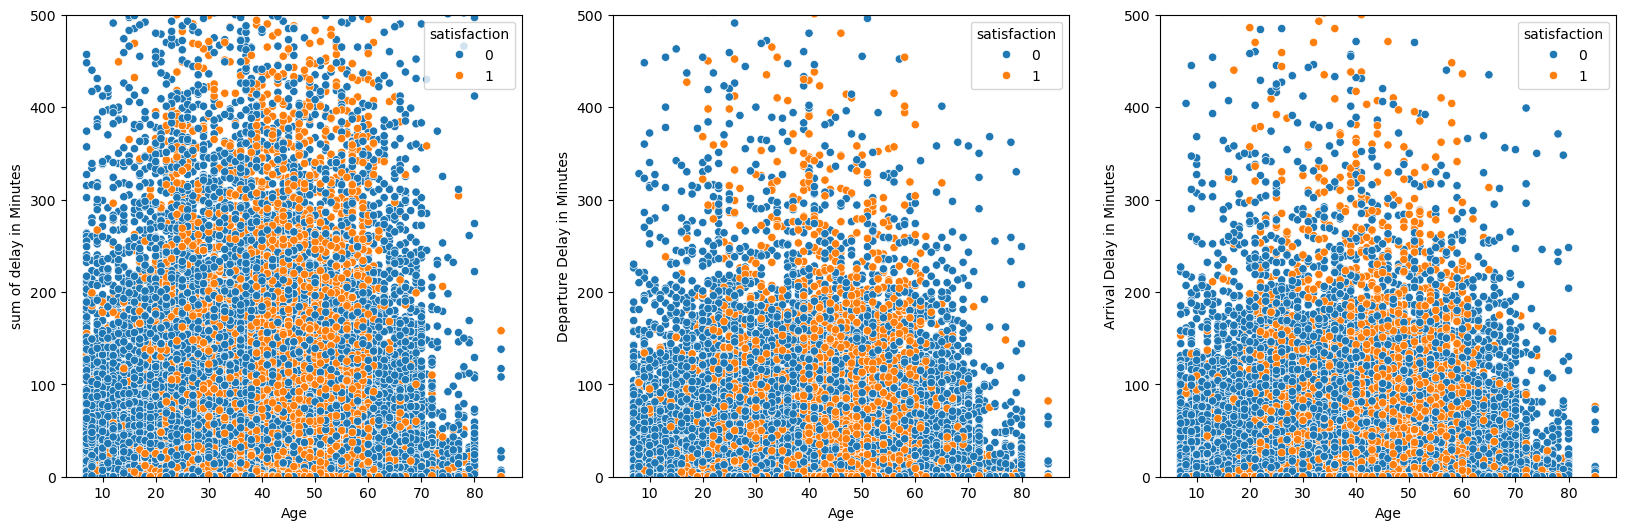

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))  

sns.scatterplot(y='sum of delay in Minutes', x='Age', hue='satisfaction', data=df1, ax=axes[0])
sns.scatterplot(y='Departure Delay in Minutes', x='Age', hue='satisfaction', data=df1, ax=axes[1])
sns.scatterplot(y='Arrival Delay in Minutes', x='Age', hue='satisfaction', data=df1, ax=axes[2])

for ax in axes:
    ax.set_ylim(0, 500)


In [35]:
df['Customer Type'].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [38]:
df['satisfaction'] = df['satisfaction'].map({
    'satisfied': 1,
    'neutral or dissatisfied': 0
})
df['Customer Type'] = df['Customer Type'].map({
    'Loyal Customer': 1,
    'disloyal Customer': 0
})
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,1,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,0
1,1,5047,Male,0,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,0
2,2,110028,Female,1,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,3,24026,Female,1,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,0
4,4,119299,Male,1,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,1


<Axes: xlabel='Age', ylabel='Flight Distance'>

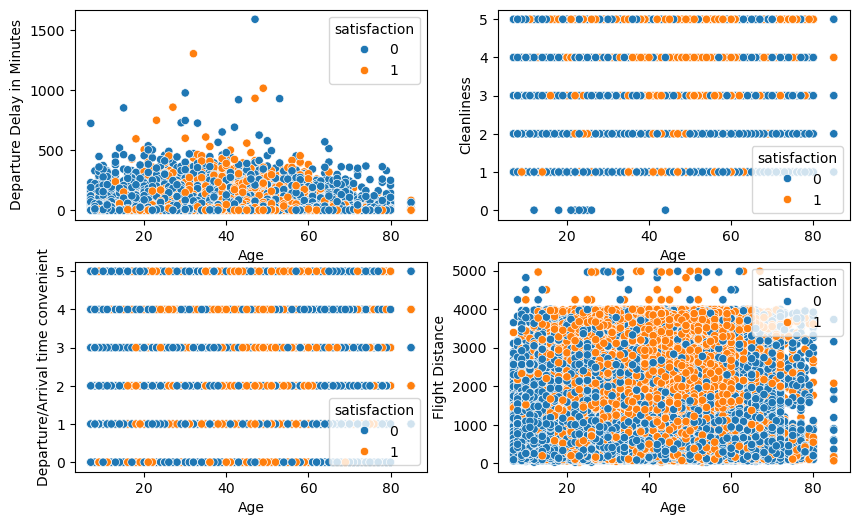

In [31]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))  

sns.scatterplot(y='Departure Delay in Minutes', x='Age', hue='satisfaction', data=df, ax=axes[0][0])
sns.scatterplot(y='Cleanliness', x='Age', hue='satisfaction', data=df, ax=axes[0][1])
sns.scatterplot(y='Departure/Arrival time convenient', x='Age', hue='satisfaction', data=df, ax=axes[1][0])
sns.scatterplot(y='Flight Distance', x='Age', hue='satisfaction', data=df, ax=axes[1][1])

<Axes: xlabel='Age', ylabel='Flight Distance'>

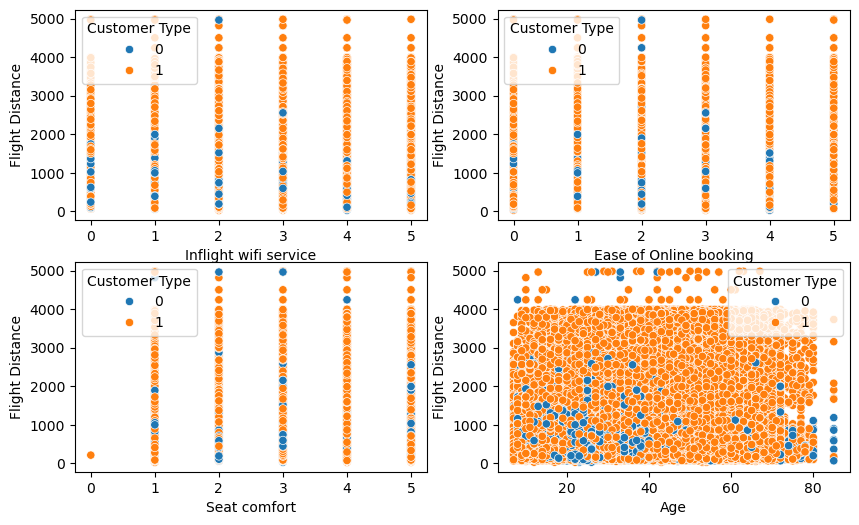

In [39]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))  

sns.scatterplot(y='Flight Distance', x='Inflight wifi service', hue='Customer Type', data=df, ax=axes[0][0])
sns.scatterplot(y='Flight Distance', x='Ease of Online booking', hue='Customer Type', data=df, ax=axes[0][1])
sns.scatterplot(y='Flight Distance', x='Seat comfort', hue='Customer Type', data=df, ax=axes[1][0])
sns.scatterplot(y='Flight Distance', x='Age', hue='Customer Type', data=df, ax=axes[1][1])